**Progetto Machine Learning**

Partecipanti
- Fiorentini Nicolò  933157
- Anoir Kadmiri 933097


In questo progetto si propone l'analisi di un dataset, applicazione di tecniche di formattazione e di trasformazione dei dati. Successivamente abbiamo una implementazione alcuni modelli e per concludere abbiamo un confronto delle performance tra i differenti modelli applicati. Dopo una fase iniziale di esplorazione, i dati vengono puliti e normalizzati per garantire qualità e coerenza. Successivamente, vengono applicati di machine learning per individuare pattern, effettuare previsioni. L’obiettivo finale è fornire un confronto tra i modelli applicati, misurandone le perfomance e l'efficenza.









ANALISI DEL DATASET

In [69]:
#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sn
import requests
import seaborn as sns

#drive.mount('/content/drive/')
#df = pd.read_csv("drive/MyDrive/Dataset/diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv")
url = "https://raw.githubusercontent.com/NIKFIORE/Progetto-Machine-Learning/refs/heads/main/Dataset/Cancer_Data.csv"
# Carica il dataset direttamente da GitHub
df = pd.read_csv(url)
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
df.drop(columns=["id"], inplace= True)
df.drop(columns=["Unnamed: 32"], inplace= True)
df.dtypes

,0
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [71]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [72]:
# Verifico se ci sono valori mancanti
missing_value = df.isnull().values.any()

# Definisco x prima di usarlo
if not missing_value:
    x = "non"
else:
    x = ""

print(f"Questo dataset {x} ha valori mancanti")

Questo dataset non ha valori mancanti


In [73]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [74]:
# Controlla i valori unici nella colonna 'diagnosis'
print(df['diagnosis'].unique())

['M' 'B']


In [75]:
# Mappatura della colonna 'diagnosis'
df["diagnosis"] = df["diagnosis"].map({'B': 0, 'M': 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
numeric_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [77]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


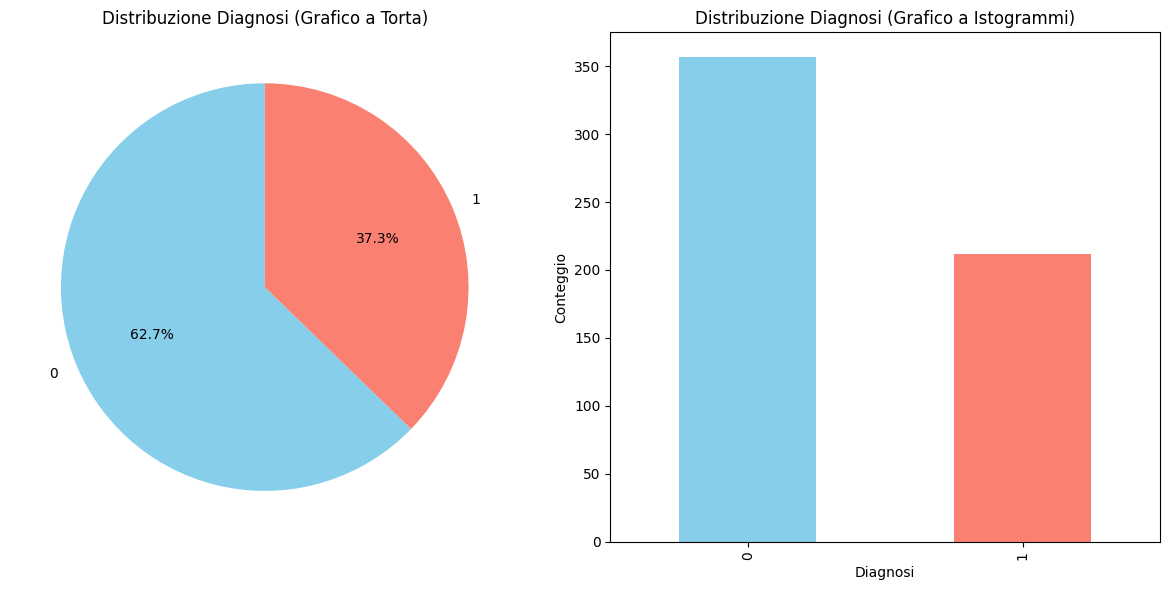

In [78]:
# Plot a torta
plt.figure(figsize=(12, 6))

# Subplot 1: Grafico a torta
plt.subplot(1, 2, 1)
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Torta)')
plt.ylabel('')

# Subplot 2: Grafico a istogrammi
plt.subplot(1, 2, 2)
df['diagnosis'].value_counts().plot.bar(color=['skyblue', 'salmon'])
plt.title('Distribuzione Diagnosi (Grafico a Istogrammi)')
plt.xlabel('Diagnosi')
plt.ylabel('Conteggio')

# Mostra il grafico
plt.tight_layout()
plt.show()

Analisi univariante

L'analisi si riferisce all'esplorazione statistica e grafica di ciascuna variabile numerica separatamente, senza considerare relazioni tra più variabili.Questa analisi è utile per comprendere la distribuzione e la variabilità dei dati prima di passare a metodi più complessi come l'analisi multivariata.

In [ ]:
numeric_data = df[numeric_columns]

# Statistiche descrittive
print("\nStatistiche descrittive:")
print(numeric_data.describe())



Statistiche descrittive:
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000

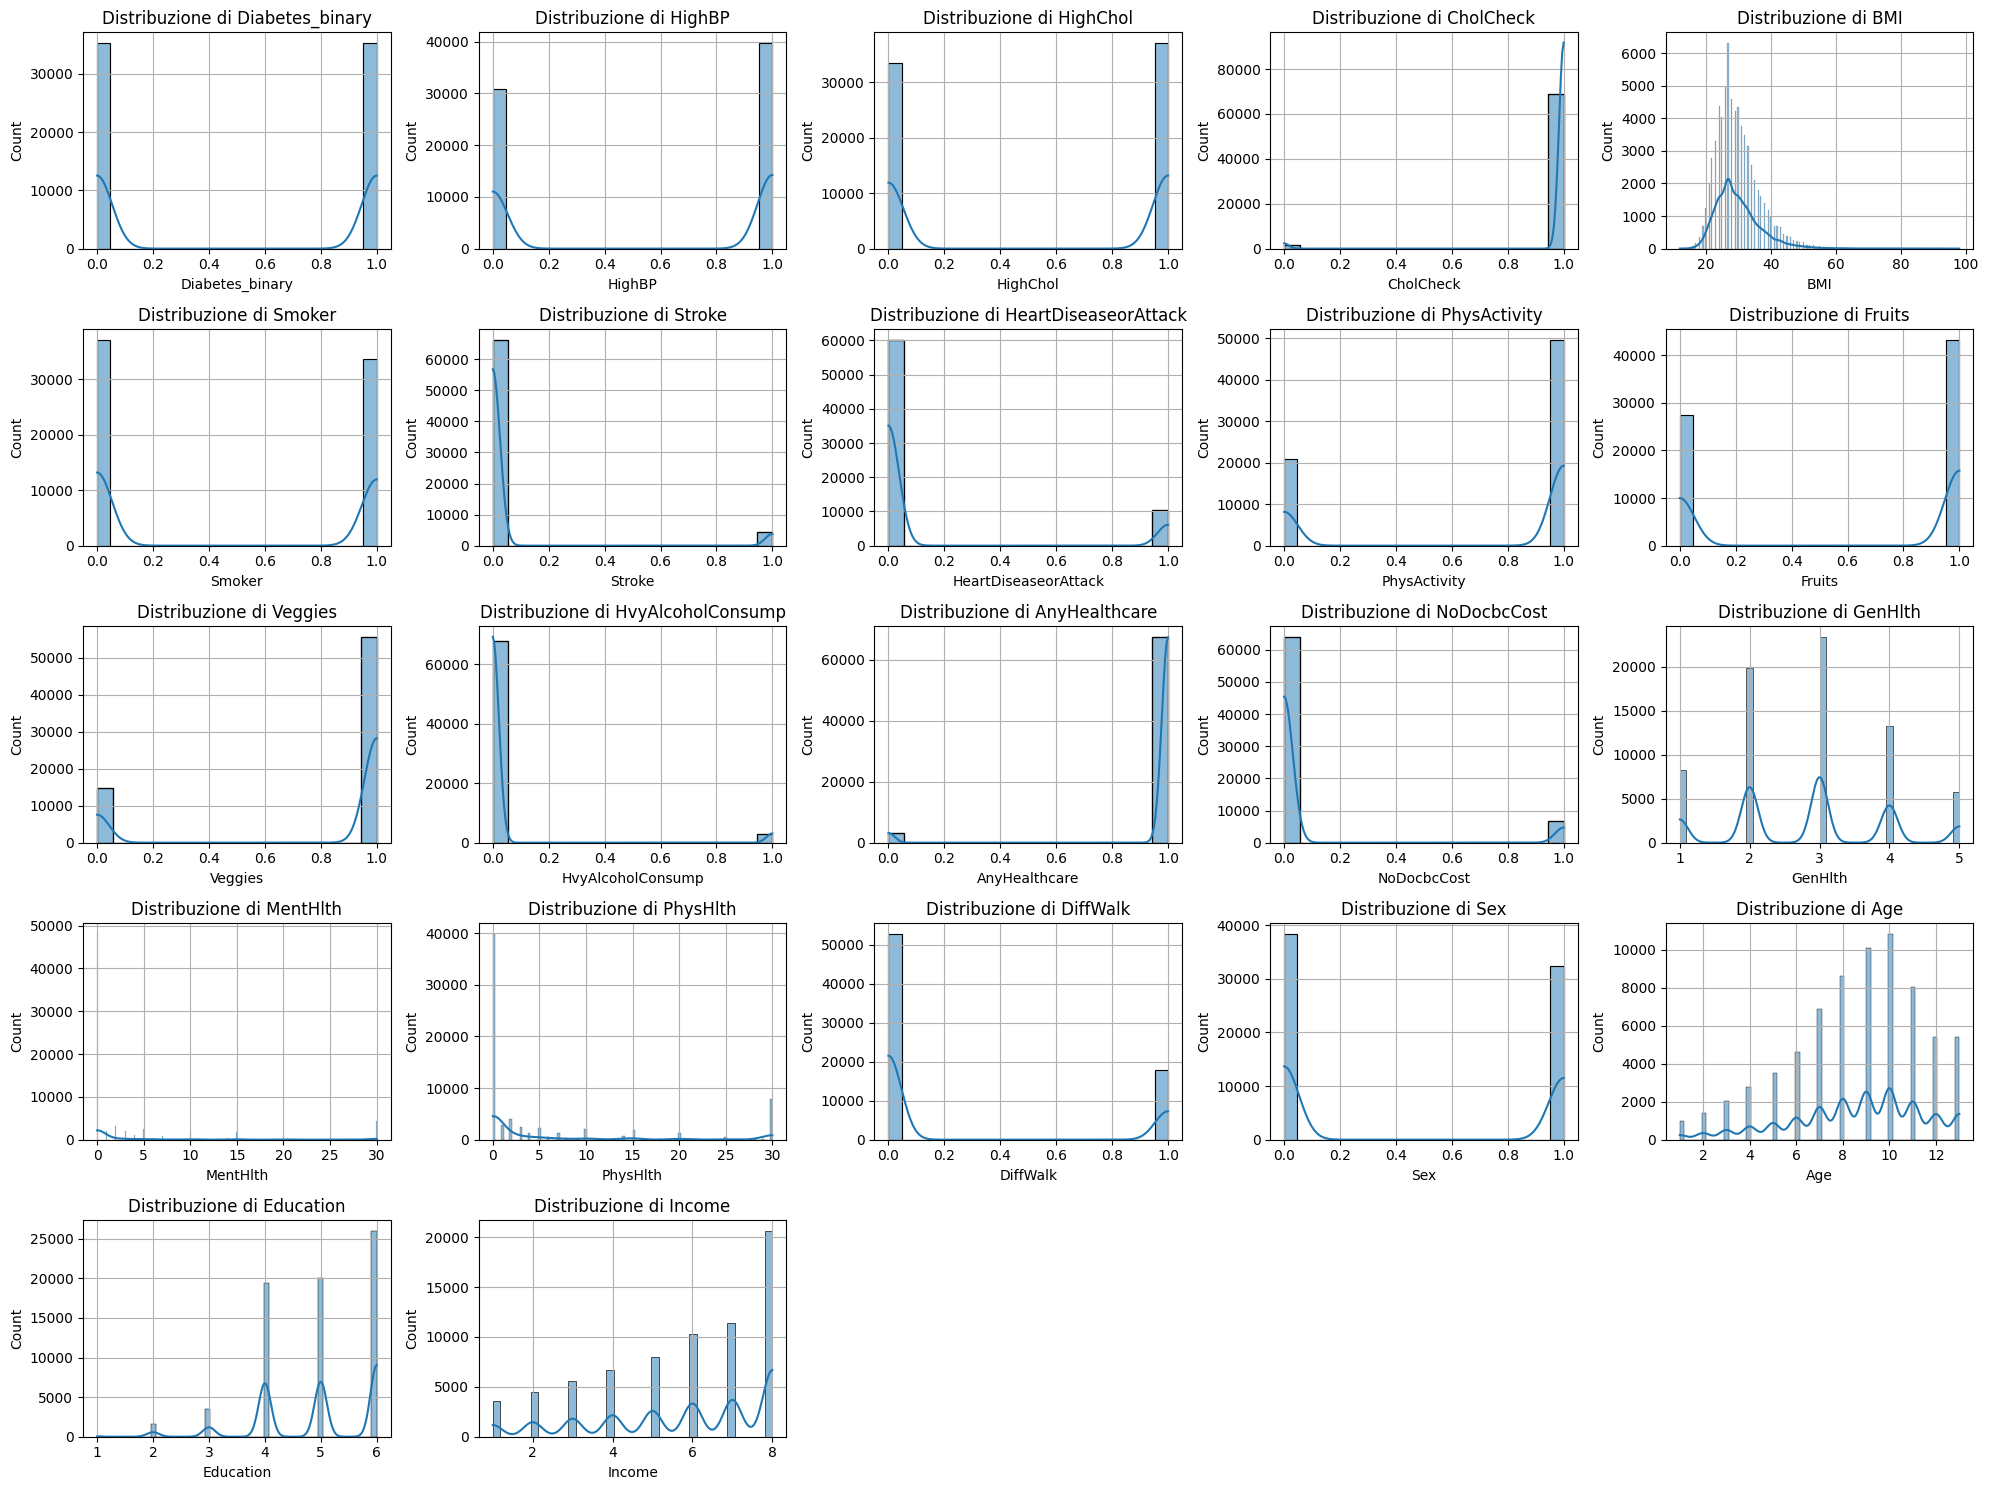

In [ ]:


plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)
    # Istogramma
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribuzione di {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

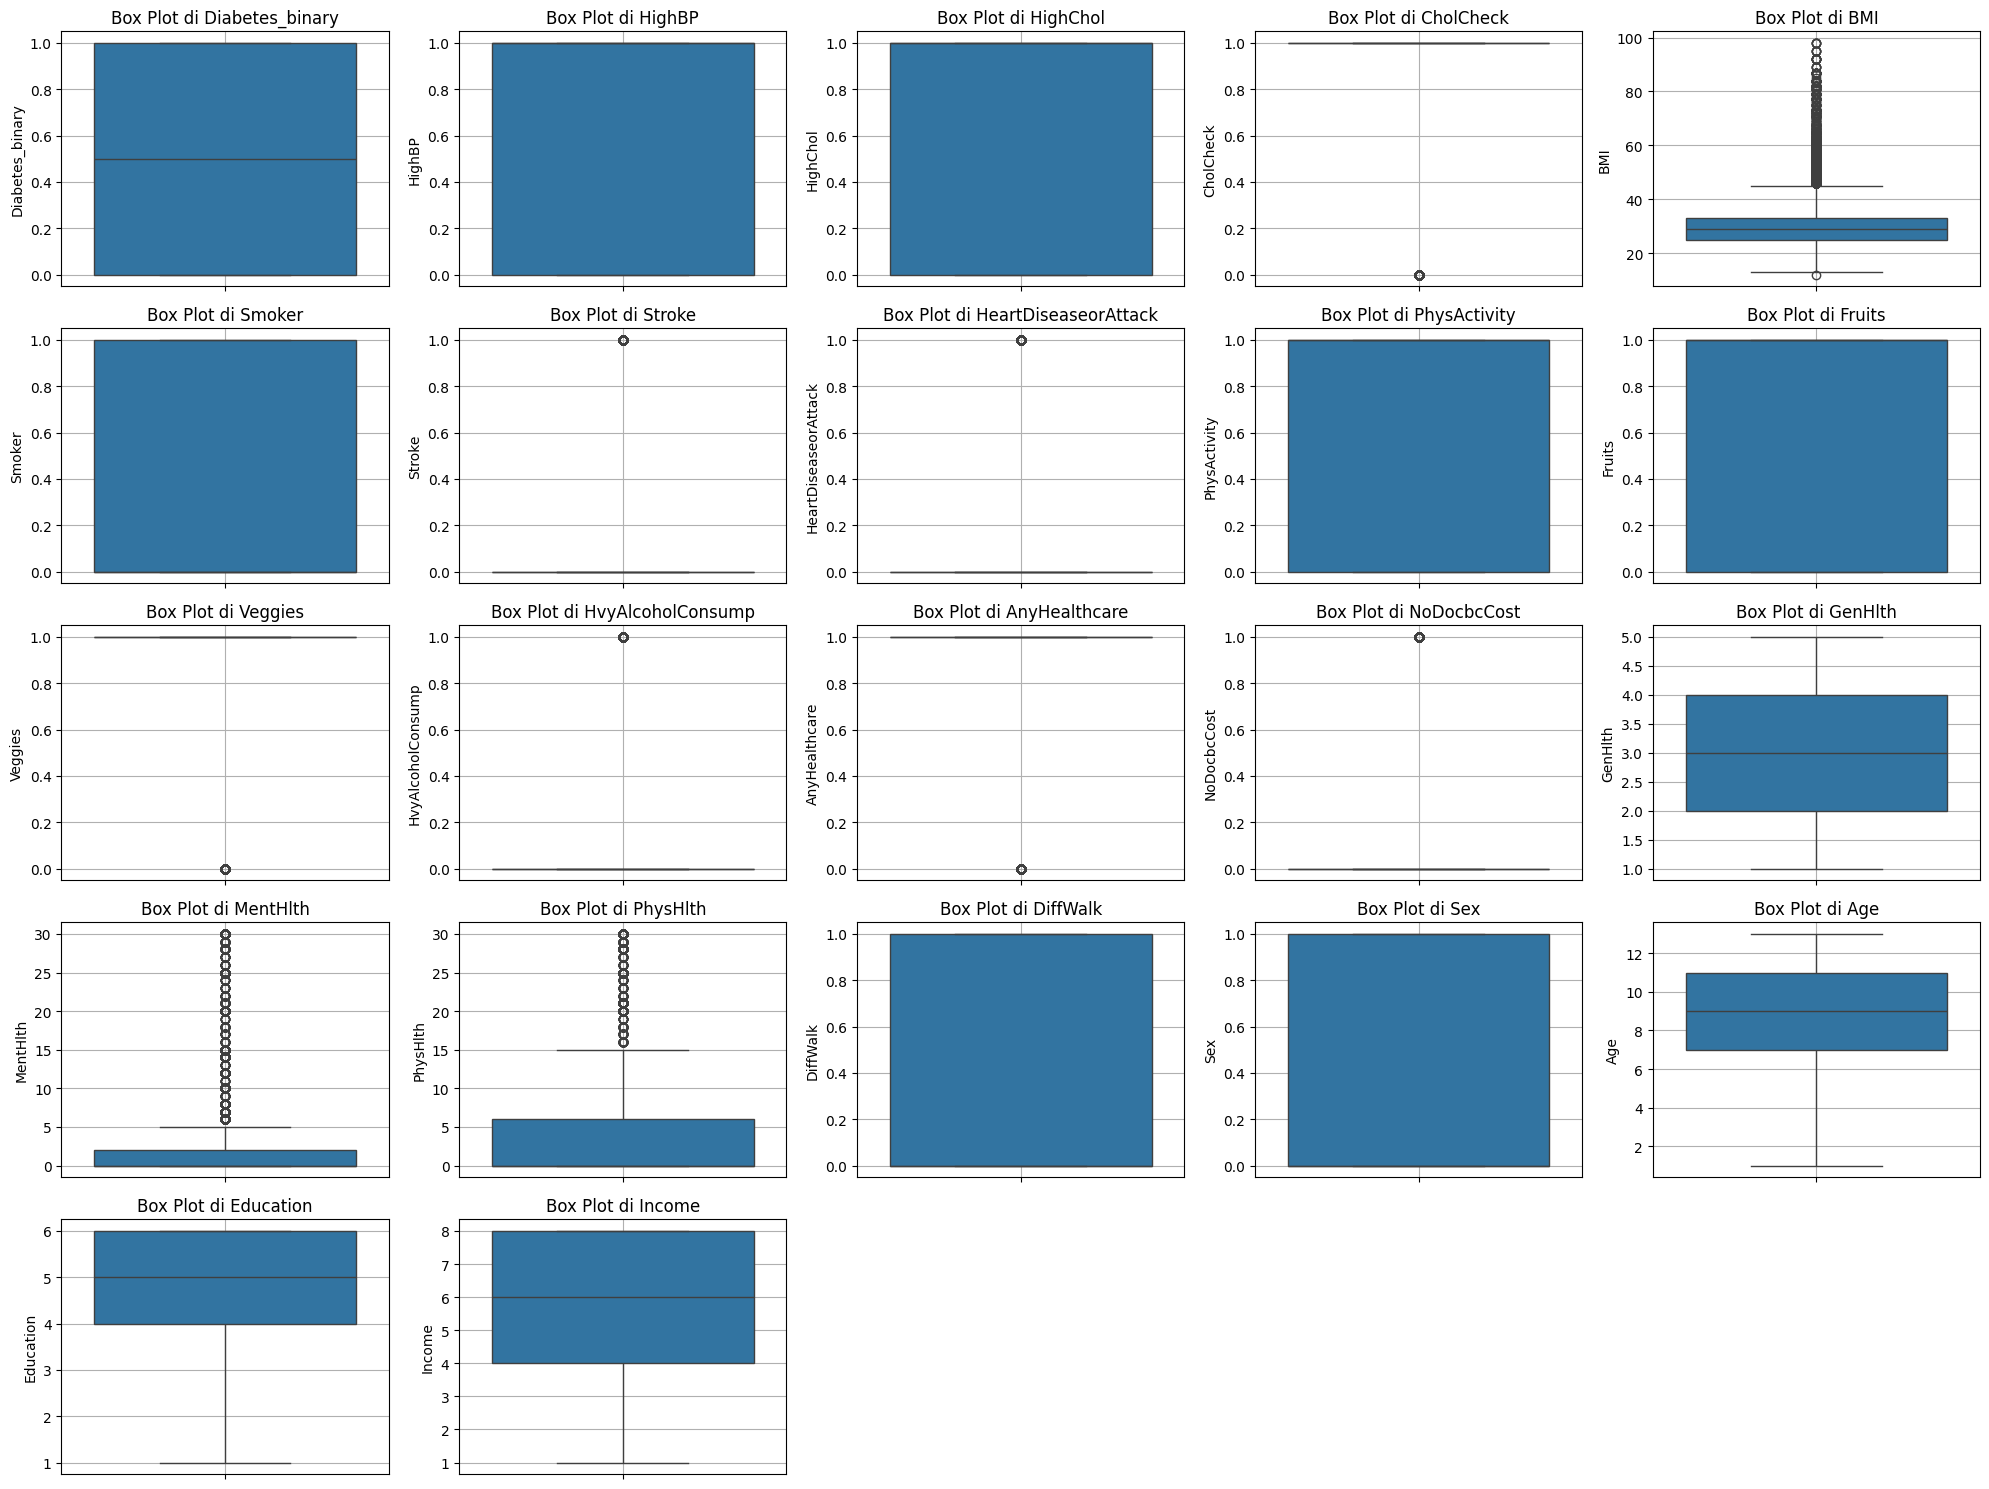

In [ ]:
# 3. Box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot di {column}')
    plt.grid(True)
plt.tight_layout()
plt.show()

I box plot che vedi sono molto densi perché le variabili rappresentate sono variabili binarie, ovvero possono assumere solo due valori (0 e 1).

ANALISI MULTIVARIANTE



L'analisi multivariante riguarda lo studio delle relazioni tra più variabili contemporaneamente, con particolare attenzione a come le caratteristiche numeriche influenzano il prezzo.

In [ ]:
# Calcolo della matrice di correlazione
correlation_matrix = numeric_data.corr()
correlation_matrix

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


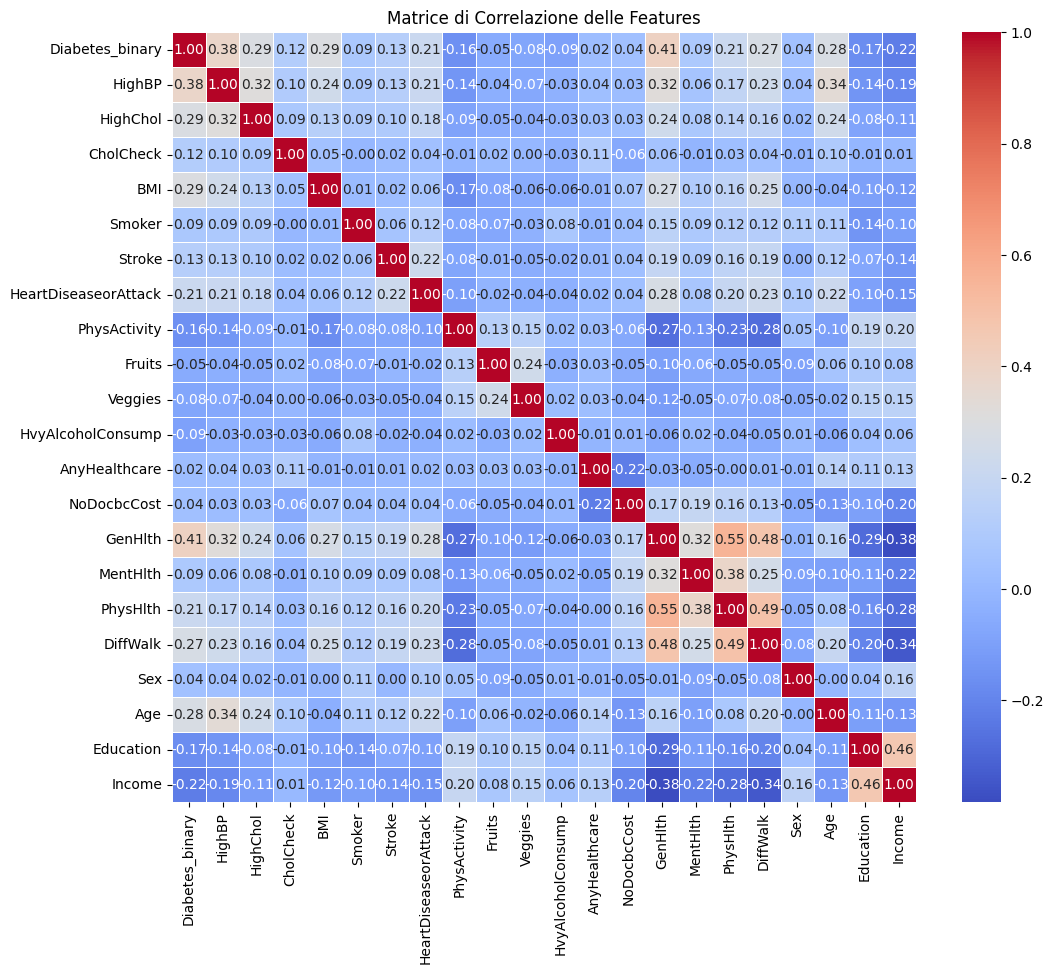

In [ ]:
# Heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione delle Features')
plt.show()

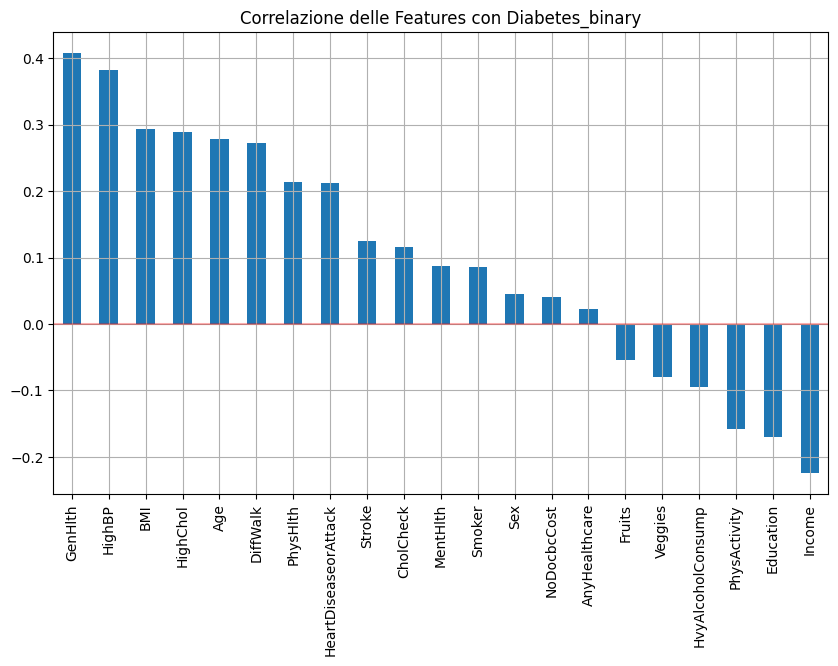

In [ ]:
# Visualizzazione grafica delle correlazioni con il target
plt.figure(figsize=(10, 6))
diabetes_correlation.drop('Diabetes_binary').plot(kind='bar')
plt.title('Correlazione delle Features con Diabetes_binary')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True)
plt.show()

In [ ]:
# Correlazione con il target
diabetes_correlation = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nCorrelazione delle features con la diagnosi PCOS:")
print(diabetes_correlation)


Correlazione delle features con la diagnosi PCOS:
Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes_binary, dtype: float64


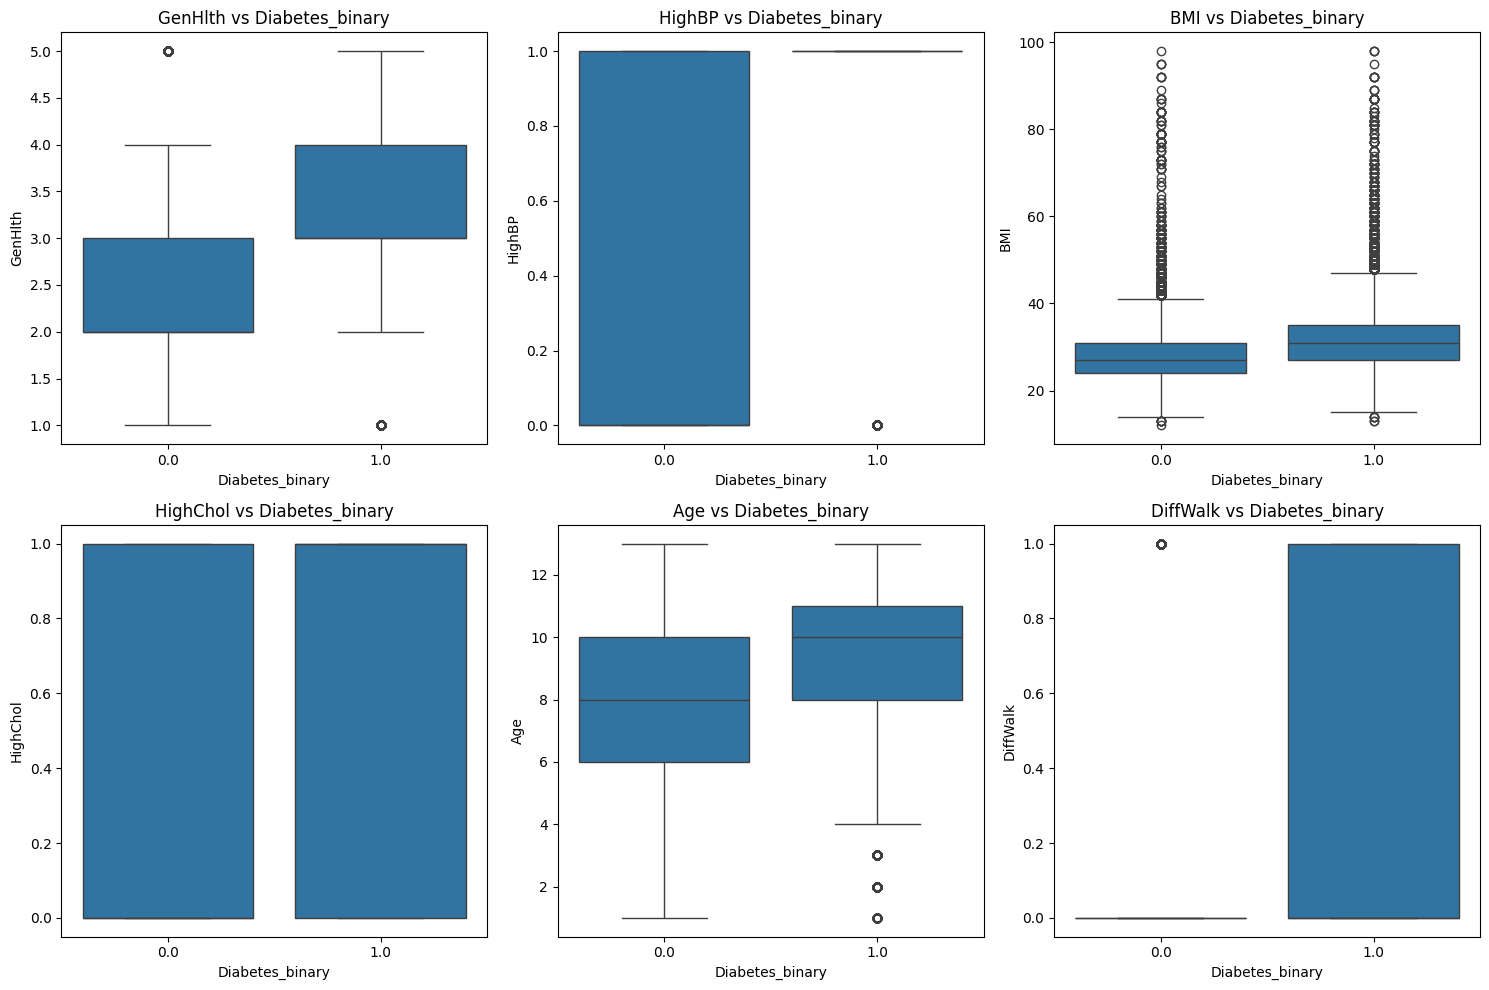

In [ ]:
# Selezioniamo le variabili più correlate
top_correlated_features = ["GenHlth", "HighBP", "BMI", "HighChol", "Age", "DiffWalk"]

plt.figure(figsize=(15, 10))

# Creiamo i boxplot per ogni feature
for i, feature in enumerate(top_correlated_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["Diabetes_binary"], y=df[feature])
    plt.title(f"{feature} vs Diabetes_binary")

plt.tight_layout()
plt.show()

APPLICAZIONE PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
scaled_data

array([[-1.        ,  0.88020109, -1.05279808, ..., -1.60723742,
         1.04856175,  1.05815996],
       [-1.        ,  0.88020109,  0.94984976, ...,  1.19768093,
         1.04856175,  1.05815996],
       [-1.        , -1.13610402, -1.05279808, ...,  1.54829572,
         1.04856175,  1.05815996],
       ...,
       [ 1.        ,  0.88020109,  0.94984976, ...,  1.54829572,
         1.04856175, -0.78076781],
       [ 1.        ,  0.88020109,  0.94984976, ...,  0.84706614,
        -2.83842972, -0.78076781],
       [ 1.        ,  0.88020109,  0.94984976, ...,  0.14583655,
         1.04856175, -1.70023169]])

In [ ]:
# Applicazione della PCA
pca = PCA().fit(scaled_data)

# Varianza spiegata
print("\nVarianza spiegata da ciascuna componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza cumulativa spiegata:")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


Varianza spiegata da ciascuna componente:
[0.17757688 0.0820032  0.06073183 0.05520657 0.05410346 0.05096877
 0.04679942 0.04276153 0.04241056 0.03958435 0.03726111 0.03605515
 0.03380319 0.03347256 0.03210843 0.03200211 0.02948895 0.02773305
 0.02483162 0.02253007 0.02112955 0.01743766]

Varianza cumulativa spiegata:
[0.17757688 0.25958008 0.3203119  0.37551847 0.42962193 0.4805907
 0.52739013 0.57015166 0.61256222 0.65214656 0.68940768 0.72546283
 0.75926601 0.79273857 0.824847   0.8568491  0.88633805 0.9140711
 0.93890272 0.96143279 0.98256234 1.        ]


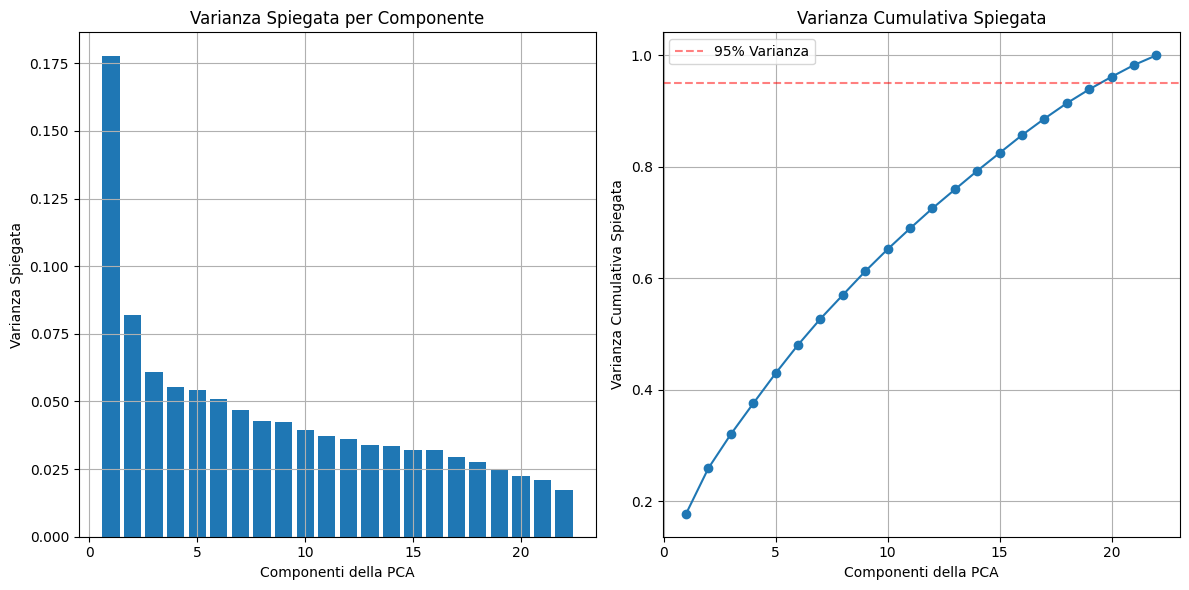

In [ ]:
# Visualizzazione della varianza spiegata
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata per Componente')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% Varianza')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza Cumulativa Spiegata')
plt.title('Varianza Cumulativa Spiegata')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Determinare il numero di componenti necessarie per spiegare il 95% della varianza
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1 # Prima componente che supera il 95%
print(f"\nNumero di componenti necessarie per spiegare il 95% della varianza: {n_components_95}")


Numero di componenti necessarie per spiegare il 95% della varianza: 20


Prepariamo il dataset per applicare i modelli

In [ ]:
from sklearn.model_selection import train_test_split
# Riduzione della dimensionalità ai componenti necessari
pca_95 = PCA(n_components=n_components_95)
pca_data_95 = pca_95.fit_transform(scaled_data)

# Seleziona feature e target
X = df.drop(['Diabetes_binary'], axis=1)  # Rimuovi la variabile target
y = df['Diabetes_binary']  # Variabile target

#dividiamo il dataset
X_train, X_test, y_train, y_test = train_test_split(pca_data_95, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RETE NEURALE

 Le Reti Neurali sono modelli di apprendimento supervisionato, il che significa
 che vengono addestrate su un dataset di esempi etichettati, dove sia gli input
 che gli output desiderati sono noti. Durante la fase di addestramento, la rete
 neurale impara a mappare gli input agli output corrispondenti, aggiustando i
 pesi delle connessioni tra i nodi per minimizzare l’errore tra l’output previsto e l’output desiderato.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Definisci l'architettura del modello di rete neurale
model = Sequential()
model.add(Dense(20, input_shape=(X_train_scaled.shape[1],), activation="relu"))
# Per classificazione binaria, usa 1 neurone di output con attivazione sigmoid
model.add(Dense(1, activation="sigmoid"))  # Output: probabilità di avere diabete


# Compila il modello
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Mostra il riepilogo dell'architettura del modello
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441 (1.72 KB)

 Trainable params: 441 (1.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Addestramento del modello
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9038 - loss: 0.2701 - val_accuracy: 0.9998 - val_loss: 0.0061
Epoch 2/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9999 - loss: 0.0039 - val_accuracy: 0.9999 - val_loss: 0.0015
Epoch 3/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9999 - val_loss: 6.8275e-04
Epoch 4/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 4.7539e-04 - val_accuracy: 0.9999 - val_loss: 3.8778e-04
Epoch 5/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 1.0000 - loss: 2.4589e-04 - val_accuracy: 0.9999 - val_loss: 2.6054e-04
Epoch 6/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 1.0000 - loss: 1.1986e-04 - val_accuracy: 0.9999 - val_loss: 2.3249e-04
Epoch 7/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 7.2261e-05 - val_accuracy: 1.0000 - val_loss: 1.3929e-04
Epoch 8/10
1238/1238 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step 

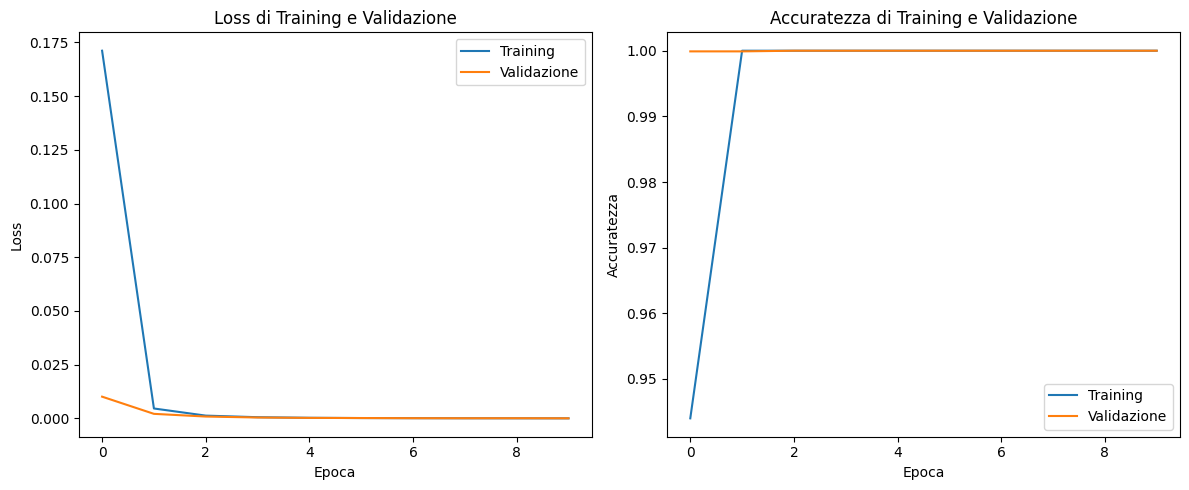

In [ ]:
# Visualizziamo l'andamento della loss durante l'addestramento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss di Training e Validazione')
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validazione'], loc='upper right')

# Visualizziamo l'andamento dell'accuratezza durante l'addestramento
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuratezza di Training e Validazione')
plt.ylabel('Accuratezza')
plt.xlabel('Epoca')
plt.legend(['Training', 'Validazione'], loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# Predizioni (probabilità di avere diabete)
y_pred_train_prob = model.predict(X_train).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_train = (y_pred_train_prob > 0.5).astype(int)

y_pred_test_prob = model.predict(X_test).flatten()
# Convertiamo le probabilità in predizioni binarie (0 o 1) usando soglia 0.5
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

# Report di classificazione per i set di training e test
print("\nReport di Classificazione - Set di Training:")
print(classification_report(y_train, y_pred_train,
                         target_names=['No Diabete', 'Diabete']))

print("\nReport di Classificazione - Set di Test:")
print(classification_report(y_test, y_pred_test,
                         target_names=['No Diabete', 'Diabete']))


1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Report di Classificazione - Set di Training:
              precision    recall  f1-score   support

  No Diabete       0.99      0.96      0.97     24745
     Diabete       0.96      0.99      0.97     24739

    accuracy                           0.97     49484
   macro avg       0.97      0.97      0.97     49484
weighted avg       0.97      0.97      0.97     49484


Report di Classificazione - Set di Test:
              precision    recall  f1-score   support

  No Diabete       0.99      0.96      0.97     10601
     Diabete       0.96      0.99      0.97     10607

    accuracy                           0.97     21208
   macro avg       0.97      0.97      0.97     21208
weighted avg       0.97      0.97      0.97     21208



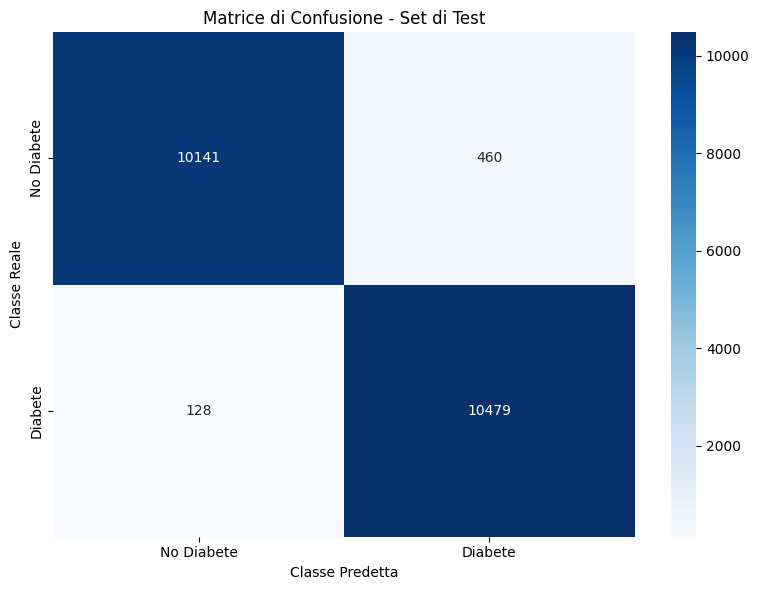

In [ ]:
# Matrice di confusione per il set di test
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabete', 'Diabete'],
            yticklabels=['No Diabete', 'Diabete'])
plt.title('Matrice di Confusione - Set di Test')
plt.ylabel('Classe Reale')
plt.xlabel('Classe Predetta')
plt.tight_layout()
plt.show()

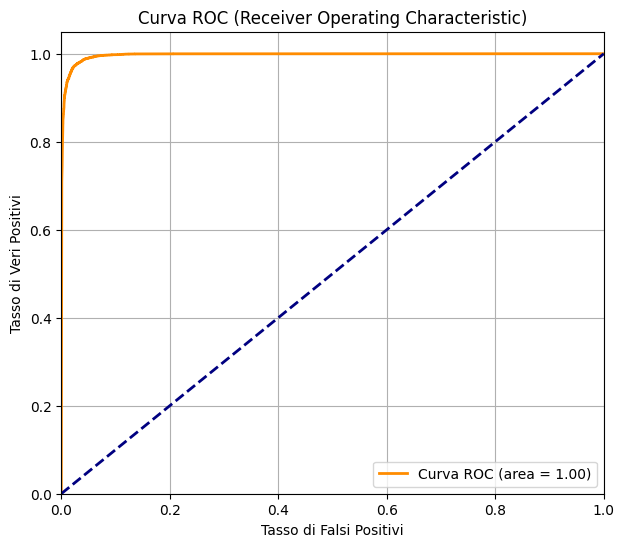

In [ ]:
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)
roc_auc = auc(fpr, tpr)

# Visualizzazione della curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasso di Falsi Positivi')
plt.ylabel('Tasso di Veri Positivi')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()